In [19]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
sz_ft = 18
sz_lb = 18
color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']
from cosmo import CosmoCalc
import sims
import tools
import lensing
import foregrounds as fg
import experiments as exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generating CMB Temperature Anisotropy Maps

In [13]:
map_params = [180, 0.5, 180, 0.5]
l, cl = CosmoCalc().cmb_power_spectrum()
cmb_map = sims.cmb_mock_data(map_params, l, cl)

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


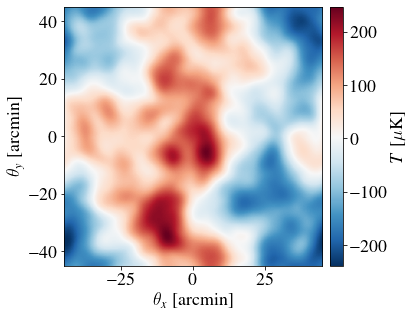

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
_, extent = tools.make_grid(map_params)


im = ax.imshow(cmb_map, extent = extent, cmap = cm.RdBu_r)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cb = fig.colorbar(im, cax = cax)

cb.set_label(label=r'$T \ [\mu$'+'K]', size=sz_ft)
cb.ax.tick_params(labelsize=sz_lb)
ax.set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
ax.set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
ax.tick_params(labelsize = sz_lb)

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/cmb_temperature_anisotropy_map.eps', dpi = 200, bbox_inches = 'tight')

## Cluster Convergence and Deflection Map

In [4]:
map_params = [180, 0.5, 180, 0.5]
kappa_map = lensing.NFW(6e14, 3, 1, 1100).convergence_map(map_params)
alpha_vec = lensing.deflection_from_convergence(map_params, kappa_map)
alphaX, alphaY = alpha_vec
alpha_map = np.hypot(alphaX, alphaY)

/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2


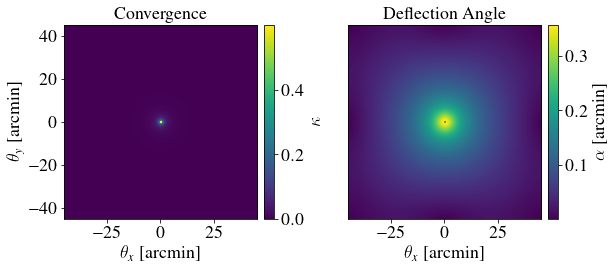

In [26]:
_, extent = tools.make_grid(map_params)
fig, axarr = plt.subplots(1,2, figsize=(8.9,8.9))

im0 = axarr[0].imshow(kappa_map, extent = extent)

divider = make_axes_locatable(axarr[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb0 = fig.colorbar(im0, cax = cax)
cb0.set_label(label = r'$\kappa$', size=sz_ft)
cb0.ax.tick_params(labelsize=sz_lb)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_title('Convergence', fontsize = sz_ft)
axarr[0].tick_params(labelsize = sz_lb)

im1 = axarr[1].imshow(alpha_map, extent = extent)
divider = make_axes_locatable(axarr[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(im1, cax = cax)
cb1.set_label(label = r'$\alpha \ $' + '[arcmin]', size=sz_ft)
cb1.ax.tick_params(labelsize=sz_lb)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_title('Deflection Angle', fontsize = sz_ft)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz_lb)

fig.tight_layout(pad=2)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/convergence_deflection_map.eps', dpi = 200, bbox_inches = 'tight')

## kSZ and tSZ Cutout

In [6]:
fname = '/Volumes/Extreme_SSD/codes/master_thesis/code/data/mdpl2_cutouts_for_tszksz_clus_detection_M1.7e+14to2.3e+14_z0.6to0.8_15320haloes_boxsize10.0am_dx0.5am.npz'
cutouts_dic = np.load(fname, allow_pickle = 1, encoding= 'latin1')['arr_0'].item()
mass_z_key = list(cutouts_dic.keys())[0]
cutouts = cutouts_dic[mass_z_key]
scale_fac = fg.compton_y_to_delta_Tcmb(150, uK = True)
tsz_cutouts, ksz_cutouts = [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutouts.append(cutouts[keyname]['y']*scale_fac)
    ksz_cutouts.append(cutouts[keyname]['ksz']*random.randrange(-1, 2, 2))
tsz_cutout = tsz_cutouts[1]
ksz_cutout = ksz_cutouts[1]

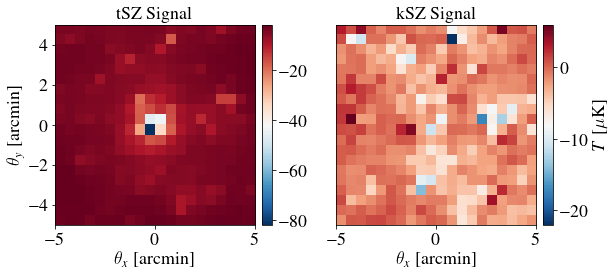

In [33]:
_, extent = tools.make_grid([20, 0.5, 20, 0.5])
fig, axarr = plt.subplots(1,2, figsize=(8.9,8.9))

im0 = axarr[0].imshow(tsz_cutout, extent = extent, cmap = cm.RdBu_r)
divider = make_axes_locatable(axarr[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb0 = fig.colorbar(im0, cax = cax)
cb0.ax.tick_params(labelsize=sz_lb)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_title('tSZ Signal', fontsize = sz_ft)
axarr[0].tick_params(labelsize = sz_lb)

im1 = axarr[1].imshow(ksz_cutout, extent = extent, cmap = cm.RdBu_r)
divider = make_axes_locatable(axarr[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(im1, cax = cax)
cb1.set_label(label=r'$T \ [\mu$'+'K]', size=sz_ft)
cb1.ax.tick_params(labelsize=sz_lb)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_title('kSZ Signal', fontsize = sz_ft)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz_lb)

fig.tight_layout(pad=2)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/tSZ_kSZ_cutout.eps', dpi = 200, bbox_inches = 'tight')

## Extragalactic Power Spectra

In [8]:
l, cl = CosmoCalc().cmb_power_spectrum()
l, cl_radio = fg.extragalactic_power_spectrum(150, components = ['radio'])
l, cl_cib = fg.extragalactic_power_spectrum(150, components = ['cib'])
l, cl_tsz = fg.extragalactic_power_spectrum(150, components = ['tsz'])
l, cl_ksz = fg.extragalactic_power_spectrum(150, components = ['ksz'])
l, cl_tsz_cib = fg.extragalactic_power_spectrum(150, components = ['tsz_cib'])
l, cl_fg_total = fg.extragalactic_power_spectrum(150, components = 'all')

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:129: RuntimeWarning: divide by zero encountered in true_divide
  cl_tsz =  (2*np.pi)/(l * (l+1)) * dl_tsz
/Volumes/Extreme_SSD/codes/master_t

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


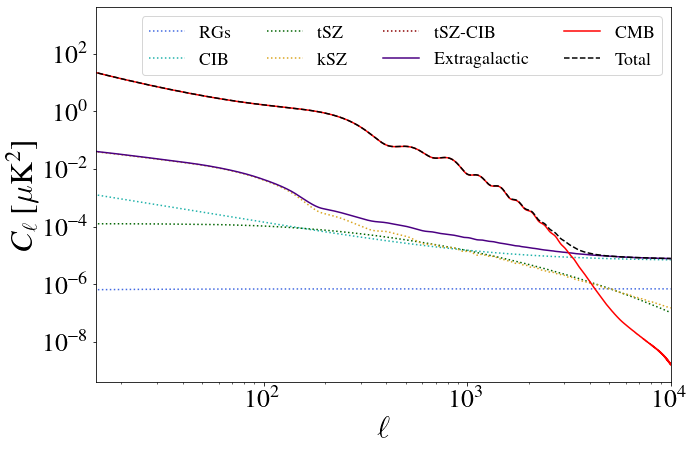

In [71]:
fig, ax = plt.subplots(figsize=(10.3,6.9))

ax.plot(l, cl_radio,  color = color_arr[1], label = r'RGs', ls = ':')
ax.plot(l, cl_cib, color = color_arr[2], label = r'CIB', ls = ':')
ax.plot(l, cl_tsz, color = color_arr[3], label = r'tSZ', ls = ':')
ax.plot(l, cl_ksz, color = color_arr[4], label = r'kSZ', ls = ':')
ax.plot(l, cl_tsz_cib, color = color_arr[5], label = r'tSZ-CIB', ls = ':')
ax.plot(l, cl_fg_total, color_arr[0], label = r'Extragalactic')
ax.plot(l, cl, 'red', label = r'CMB')
ax.plot(l, cl_fg_total+cl, 'black', label = r'Total', ls = '--')
ax.tick_params(labelsize = sz_lb+8)
ax.set_xlim(15, 10000) 
ax.set_xlabel(r'$\ell$', fontsize = sz_ft+14)
ax.set_ylabel(r'$C_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz_ft+14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol = 4, prop={'size': sz_lb}) 

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/extragalactic_power_spectra.eps', dpi = 200, bbox_inches = 'tight')